In [1]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Initialize the ScratchLogisticRegression model.
        
        Parameters:
        - learning_rate: Learning rate for gradient descent.
        - n_iter: Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.theta = None  # Parameter (weight) vector

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        g(z) = 1 / (1 + exp(-z))
        
        Parameters:
        - z: Input value or array.
        
        Returns:
        - Sigmoid of the input.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.
        
        Parameters:
        - X: Training features, shape (n_samples, n_features).
        - y: Target labels, shape (n_samples,).
        """
        # Add a bias term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term (bias)
        n_samples, n_features = X.shape

        # Initialize weights (theta) with zeros
        self.theta = np.zeros(n_features)

        # Perform gradient descent
        for _ in range(self.n_iter):
            # Calculate the linear combination
            z = np.dot(X, self.theta)
            # Apply the sigmoid function
            predictions = self.sigmoid(z)
            # Compute the gradient
            gradient = np.dot(X.T, (predictions - y)) / n_samples
            # Update weights
            self.theta -= self.learning_rate * gradient

    def predict_proba(self, X):
        """
        Predict the probability of the positive class (1).
        
        Parameters:
        - X: Features, shape (n_samples, n_features).
        
        Returns:
        - Probabilities, shape (n_samples,).
        """
        # Add a bias term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.theta)
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """
        Predict the class labels (0 or 1) based on the threshold.
        
        Parameters:
        - X: Features, shape (n_samples, n_features).
        - threshold: Decision boundary for classification.
        
        Returns:
        - Predicted labels, shape (n_samples,).
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels

# Initialize and train the model
model = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000)
model.fit(X, y)

# Make predictions
proba = model.predict_proba(X)  # Predicted probabilities
labels = model.predict(X)       # Predicted labels

print("Predicted probabilities:", proba[:5])
print("Predicted labels:", labels[:5])


Predicted probabilities: [0.62597537 0.74099911 0.08402599 0.2748155  0.69107312]
Predicted labels: [1 1 0 0 1]


In [3]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, regularization_param=0.0):
        """
        Initialize the ScratchLogisticRegression model.

        Parameters:
        - learning_rate: Learning rate for gradient descent.
        - n_iter: Number of iterations for training.
        - regularization_param: Regularization parameter (lambda). Default is 0 (no regularization).
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.regularization_param = regularization_param  # Regularization strength
        self.theta = None

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def _gradient_descent(self, X, y):
        """
        Perform one iteration of gradient descent and update the parameters.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - y: Labels, shape (n_samples,).
        """
        m = X.shape[0]  # Number of samples
        z = np.dot(X, self.theta)  # Linear combination
        predictions = self.sigmoid(z)  # Sigmoid function output

        # Gradient calculation
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m

        # Apply regularization (exclude theta[0] from regularization)
        regularization_term = self.regularization_param * self.theta / m
        regularization_term[0] = 0  # No regularization for intercept (theta[0])

        # Update the parameters (theta)
        self.theta -= self.learning_rate * (gradient + regularization_term)

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X: Training features, shape (n_samples, n_features).
        - y: Target labels, shape (n_samples,).
        """
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (1 for intercept)
        n_features = X.shape[1]

        # Initialize parameters (theta)
        self.theta = np.zeros(n_features)

        # Perform gradient descent for the specified number of iterations
        for _ in range(self.n_iter):
            self._gradient_descent(X, y)

    def predict_proba(self, X):
        """
        Predict the probability of the positive class (1).

        Parameters:
        - X: Features, shape (n_samples, n_features).

        Returns:
        - Probabilities, shape (n_samples,).
        """
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.theta)
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """
        Predict the class labels (0 or 1) based on the threshold.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - threshold: Decision boundary for classification.

        Returns:
        - Predicted labels, shape (n_samples,).
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


In [4]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels

# Initialize and train the model
model = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000, regularization_param=0.1)
model.fit(X, y)

# Make predictions
proba = model.predict_proba(X)  # Predicted probabilities
labels = model.predict(X)       # Predicted labels

print("Predicted probabilities:", proba[:5])
print("Predicted labels:", labels[:5])


Predicted probabilities: [0.61954909 0.73217386 0.0885313  0.27831817 0.68302518]
Predicted labels: [1 1 0 0 1]


In [5]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, regularization_param=0.0):
        """
        Initialize the ScratchLogisticRegression model.

        Parameters:
        - learning_rate: Learning rate for gradient descent.
        - n_iter: Number of iterations for training.
        - regularization_param: Regularization parameter (lambda). Default is 0 (no regularization).
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.regularization_param = regularization_param  # Regularization strength
        self.theta = None

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        
        Parameters:
        - z: Input value or array.
        
        Returns:
        - Sigmoid of the input.
        """
        return 1 / (1 + np.exp(-z))

    def _gradient_descent(self, X, y):
        """
        Perform one iteration of gradient descent and update the parameters.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - y: Labels, shape (n_samples,).
        """
        m = X.shape[0]  # Number of samples
        z = np.dot(X, self.theta)  # Linear combination
        predictions = self.sigmoid(z)  # Sigmoid function output

        # Gradient calculation
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m

        # Apply regularization (exclude theta[0] from regularization)
        regularization_term = self.regularization_param * self.theta / m
        regularization_term[0] = 0  # No regularization for intercept (theta[0])

        # Update the parameters (theta)
        self.theta -= self.learning_rate * (gradient + regularization_term)

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X: Training features, shape (n_samples, n_features).
        - y: Target labels, shape (n_samples,).
        """
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (1 for intercept)
        n_features = X.shape[1]

        # Initialize parameters (theta)
        self.theta = np.zeros(n_features)

        # Perform gradient descent for the specified number of iterations
        for _ in range(self.n_iter):
            self._gradient_descent(X, y)

    def predict_proba(self, X):
        """
        Predict the probability of the positive class (1).

        Parameters:
        - X: Features, shape (n_samples, n_features).

        Returns:
        - Probabilities, shape (n_samples,).
        """
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Compute the hypothesis function h_theta(x) = sigmoid(X @ theta)
        z = np.dot(X, self.theta)
        probabilities = self.sigmoid(z)
        return probabilities

    def predict(self, X, threshold=0.5):
        """
        Predict the class labels (0 or 1) based on the threshold.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - threshold: Decision boundary for classification.

        Returns:
        - Predicted labels, shape (n_samples,).
        """
        # Predict probabilities using predict_proba
        probabilities = self.predict_proba(X)
        # Apply threshold to convert probabilities into binary labels
        return (probabilities >= threshold).astype(int)


In [6]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels

# Initialize and train the model
model = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000, regularization_param=0.1)
model.fit(X, y)

# Make predictions
proba = model.predict_proba(X)  # Predicted probabilities
labels = model.predict(X)       # Predicted labels

print("Predicted probabilities:", proba[:5])
print("Predicted labels:", labels[:5])


Predicted probabilities: [0.61954909 0.73217386 0.0885313  0.27831817 0.68302518]
Predicted labels: [1 1 0 0 1]


In [8]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, regularization_param=0.0):
        """
        Initialize the ScratchLogisticRegression model.

        Parameters:
        - learning_rate: Learning rate for gradient descent.
        - n_iter: Number of iterations for training.
        - regularization_param: Regularization parameter (lambda). Default is 0 (no regularization).
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.regularization_param = regularization_param  # Regularization strength
        self.theta = None
        self.loss = []  # To store the training loss
        self.val_loss = []  # To store the validation loss

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, X, y):
        """
        Compute the loss function (log loss) with regularization.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - y: Labels, shape (n_samples,).

        Returns:
        - Loss value (float).
        """
        m = X.shape[0]  # Number of samples
        z = np.dot(X, self.theta)
        predictions = self.sigmoid(z)

        # Compute the log loss
        loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

        # Add regularization term (exclude theta[0])
        reg_term = (self.regularization_param / (2 * m)) * np.sum(self.theta[1:] ** 2)
        return loss + reg_term

    def _gradient_descent(self, X, y):
        """
        Perform one iteration of gradient descent and update the parameters.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - y: Labels, shape (n_samples,).
        """
        m = X.shape[0]  # Number of samples
        z = np.dot(X, self.theta)
        predictions = self.sigmoid(z)

        # Gradient calculation
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m

        # Apply regularization (exclude theta[0] from regularization)
        regularization_term = self.regularization_param * self.theta / m
        regularization_term[0] = 0  # No regularization for intercept (theta[0])

        # Update the parameters (theta)
        self.theta -= self.learning_rate * (gradient + regularization_term)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X: Training features, shape (n_samples, n_features).
        - y: Training labels, shape (n_samples,).
        - X_val: Validation features (optional), shape (n_val_samples, n_features).
        - y_val: Validation labels (optional), shape (n_val_samples,).
        """
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (1 for intercept)
        if X_val is not None:
            X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

        n_features = X.shape[1]
        self.theta = np.zeros(n_features)  # Initialize weights

        for _ in range(self.n_iter):
            # Perform gradient descent
            self._gradient_descent(X, y)

            # Record the training loss
            train_loss = self._compute_loss(X, y)
            self.loss.append(train_loss)

            # Record the validation loss if validation data is provided
            if X_val is not None and y_val is not None:
                val_loss = self._compute_loss(X_val, y_val)
                self.val_loss.append(val_loss)

    def predict_proba(self, X):
        """
        Predict the probability of the positive class (1).

        Parameters:
        - X: Features, shape (n_samples, n_features).

        Returns:
        - Probabilities, shape (n_samples,).
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term
        z = np.dot(X, self.theta)
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        """
        Predict the class labels (0 or 1) based on the threshold.

        Parameters:
        - X: Features, shape (n_samples, n_features).
        - threshold: Decision boundary for classification.

        Returns:
        - Predicted labels, shape (n_samples,).
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


In [9]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels

# Validation data
X_val = np.random.rand(50, 2)
y_val = (X_val[:, 0] + X_val[:, 1] > 1).astype(int)

# Initialize and train the model
model = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000, regularization_param=0.1)
model.fit(X, y, X_val, y_val)

# Make predictions
proba = model.predict_proba(X)  # Predicted probabilities
labels = model.predict(X)       # Predicted labels

# Print losses
print("Training loss:", model.loss[-1])
print("Validation loss:", model.val_loss[-1])


Training loss: 0.33171266383176307
Validation loss: 0.3545054672951005


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter only versicolor (1) and virginica (2) classes
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Convert labels to binary (versicolor = 0, virginica = 1)
y = (y == 2).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train ScratchLogisticRegression
scratch_model = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000, regularization_param=0.1)
scratch_model.fit(X_train, y_train)

# Make predictions with ScratchLogisticRegression
y_pred_scratch = scratch_model.predict(X_test)
y_proba_scratch = scratch_model.predict_proba(X_test)

# Train Scikit-learn Logistic Regression
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# Make predictions with Scikit-learn
y_pred_sklearn = sklearn_model.predict(X_test)
y_proba_sklearn = sklearn_model.predict_proba(X_test)[:, 1]

# Evaluate metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
}

print("Metrics Comparison:")
for metric_name, metric_func in metrics.items():
    scratch_value = metric_func(y_test, y_pred_scratch)
    sklearn_value = metric_func(y_test, y_pred_sklearn)
    print(f"{metric_name} - Scratch: {scratch_value:.4f}, Scikit-learn: {sklearn_value:.4f}")


Metrics Comparison:
Accuracy - Scratch: 0.9333, Scikit-learn: 0.9000
Precision - Scratch: 0.9333, Scikit-learn: 0.9286
Recall - Scratch: 0.9333, Scikit-learn: 0.8667


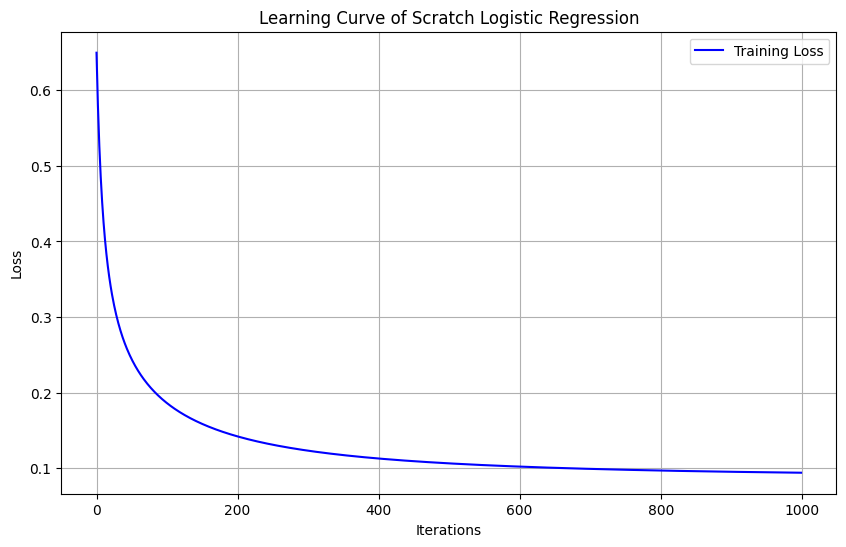

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(scratch_model.loss, label="Training Loss", color="blue")
if scratch_model.val_loss:  # Check if validation loss exists
    plt.plot(scratch_model.val_loss, label="Validation Loss", color="orange")

plt.title("Learning Curve of Scratch Logistic Regression")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


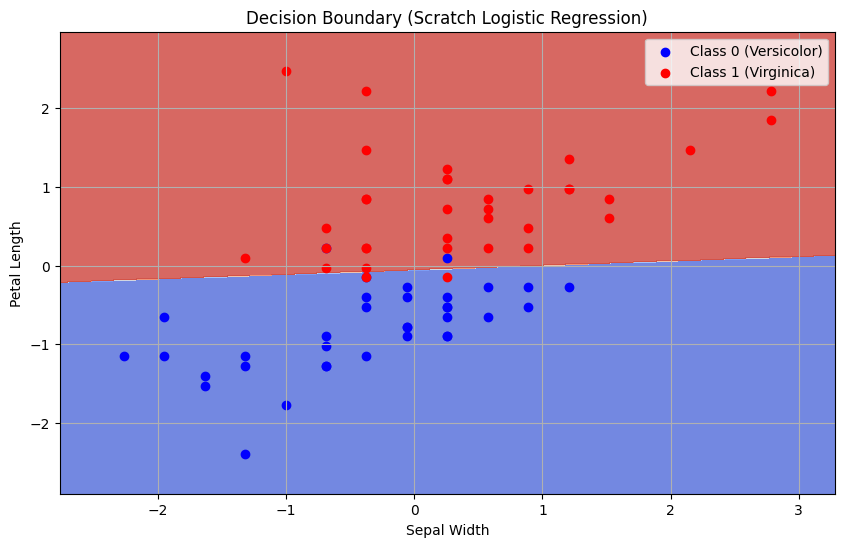

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Select only two features: sepal width (index 1) and petal length (index 2)
X_train_2d = X_train[:, [1, 2]]
X_test_2d = X_test[:, [1, 2]]

# Train ScratchLogisticRegression on the two selected features
scratch_model_2d = ScratchLogisticRegression(learning_rate=0.1, n_iter=1000, regularization_param=0.1)
scratch_model_2d.fit(X_train_2d, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for each point in the meshgrid
Z = scratch_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")

# Plot training points
plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1], color="blue", label="Class 0 (Versicolor)")
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1], color="red", label="Class 1 (Virginica)")

plt.title("Decision Boundary (Scratch Logistic Regression)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=100, regularization_param=0.0):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.regularization_param = regularization_param
        self.theta = None
        self.loss = []
        self.val_loss = []

    # Other methods like fit, predict, predict_proba, etc.

    def save_weights(self, file_path):
        """
        Save the model's weights (theta) to a file.
        
        Parameters:
        file_path (str): File path to save the weights.
        """
        if self.theta is None:
            raise ValueError("Model has not been trained. No weights to save.")
        np.savez(file_path, weights=self.theta)
        print(f"Weights saved to {file_path}.npz")

    def load_weights(self, file_path):
        """
        Load weights (theta) from a file and assign them to the model.
        
        Parameters:
        file_path (str): File path from which to load the weights.
        """
        try:
            data = np.load(file_path + ".npz")
            self.theta = data["weights"]
            print(f"Weights loaded from {file_path}.npz")
        except FileNotFoundError:
            raise FileNotFoundError(f"The file {file_path}.npz does not exist.")


In [15]:
def fit(self, X, y):
    """
    Train the model using gradient descent.

    Parameters:
    X (ndarray): Feature matrix of shape (n_samples, n_features)
    y (ndarray): Target vector of shape (n_samples,)
    """
    n_samples, n_features = X.shape
    self.theta = np.zeros(n_features)  # Initialize weights

    for i in range(self.n_iter):
        # Calculate predictions
        predictions = self._sigmoid(np.dot(X, self.theta))

        # Compute gradients
        errors = predictions - y
        gradient = (1 / n_samples) * (np.dot(X.T, errors) + self.regularization_param * self.theta)
        gradient[0] -= (self.regularization_param * self.theta[0]) / n_samples  # Exclude bias term from regularization

        # Update weights
        self.theta -= self.learning_rate * gradient

        # Calculate loss
        loss = self._compute_loss(X, y)
        self.loss.append(loss)

        # (Optional) Calculate validation loss if you use a validation set
        # Add the logic here if you want val_loss tracking

    print("Training complete.")
